In [1]:
import keras
from keras import layers
from keras.utils import np_utils
from keras import datasets

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## test 데이타 만들기

In [2]:
(X, y), (XX_test, yy_test) = datasets.cifar10.load_data()

In [3]:
nb_classes = 10 # 분류 갯수 

In [4]:
X.shape, X.shape[1:]

((50000, 32, 32, 3), (32, 32, 3))

In [5]:
input_shape = X.shape[1:] #input_shape 찾기

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [7]:
scaler = MinMaxScaler()

In [8]:
X_train.shape

(37500, 32, 32, 3)

In [9]:
n = X_train.shape[0]
X_train = scaler.fit_transform(X_train.reshape(n, -1)).reshape(X_train.shape)
n = X_test.shape[0]
X_test = scaler.transform(X_test.reshape(n, -1)).reshape(X_test.shape)

In [10]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## model 만들기

In [11]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(nb_classes, activation='softmax'))


In [12]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [27]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_data=(X_test, Y_test))

Train on 37500 samples, validate on 12500 samples
Epoch 1/10
37500/37500 [==============================] - 173s 5ms/step - loss: 1.7119 - acc: 0.3778 - val_loss: 1.3687 - val_acc: 0.5106
Epoch 2/10
37500/37500 [==============================] - 177s 5ms/step - loss: 1.3728 - acc: 0.5111 - val_loss: 1.1608 - val_acc: 0.5900
Epoch 3/10
37500/37500 [==============================] - 184s 5ms/step - loss: 1.2356 - acc: 0.5655 - val_loss: 1.0827 - val_acc: 0.6199
Epoch 4/10
37500/37500 [==============================] - 181s 5ms/step - loss: 1.1379 - acc: 0.5973 - val_loss: 1.0370 - val_acc: 0.6383
Epoch 5/10
37500/37500 [==============================] - 185s 5ms/step - loss: 1.0831 - acc: 0.6146 - val_loss: 0.9915 - val_acc: 0.6489
Epoch 6/10
37500/37500 [==============================] - 181s 5ms/step - loss: 1.0298 - acc: 0.6363 - val_loss: 0.9578 - val_acc: 0.6606
Epoch 7/10
37500/37500 [==============================] - 198s 5ms/step - loss: 0.9779 - acc: 0.6523 - val_loss: 0.9439 - 

In [13]:
import pickle

In [14]:
# model.save('cnn_cifra10.h5')

#pickle.dump(scaler, open('cnn_cifra10_scaler.npy', 'wb'))
#pickle.dump(history, open('cnn_cifra10_history.npy', 'wb'))

In [15]:
model= keras.models.load_model('cnn_cifra10.h5')
history = pickle.load(open('cnn_cifra10_history.npy', 'rb'))
scaler = pickle.load(open('cnn_cifra10_scaler.npy', 'rb'))


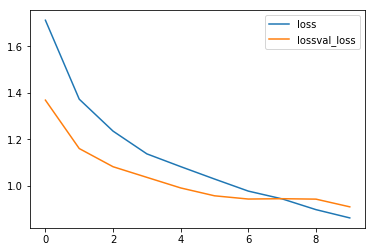

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='lossval_loss')
plt.legend()

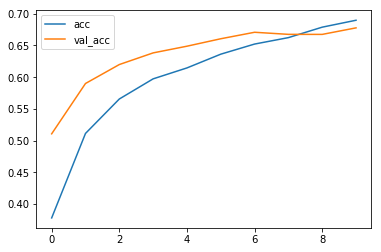

In [17]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend()

In [18]:
score = model.evaluate(X_test, Y_test)

12500/12500 [==============================] - 18s 1ms/step


In [19]:
score

[0.9103488277816773, 0.67784]

In [20]:
XX_test.shape, yy_test.shape  

((10000, 32, 32, 3), (10000, 1))

In [21]:
n = XX_test.shape[0]
score = model.evaluate(scaler.transform(XX_test.reshape(n, -1)).reshape(XX_test.shape)
                       , np_utils.to_categorical(yy_test, nb_classes))

10000/10000 [==============================] - 14s 1ms/step


In [22]:
score

[0.9137110391616822, 0.682]